<a href="https://colab.research.google.com/github/KusumSangwan08/ML-project/blob/main/ml_star_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Star Stellar Classification ML Project

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classify stars, galaxies, and quasars based on their spectral characteristics.

#Content
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

run_ID = Run Number used to identify the specific scan

rereun_ID = Rerun Number to specify how the image was processed

cam_col = Camera column to identify the scanline within the run

field_ID = Field number to identify each field

spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 
2 different observations with the same spec_obj_ID must share the output class)

class = object class (galaxy, star or quasar object)

redshift = redshift value based on the increase in wavelength

plate = plate ID, identifies each plate in SDSS

MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


# Details related to this project

In this project, I will try to predict the class of star with various ML algorithms such as SVM Classifier, Navie Bayes Classifier, Random Forest Classifier and XGboost Classifier. The data is downloaded from (https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download&select=star_classification.csv).

The following steps are taken in this work:


1. Downloading this dataset from Kaggle
2. Understanding the dataset, formulating the problem and describing the objective
3. Performing a exploratory data analysis, gathering insights, creating a training, & test split and finally preparing the data for modeling.
4. Training & evaluating the different machine learning models.
5. Comparing their performances.
6. Reporting the final performance of best model and showing sample predictions.

At last, summary of the work and links to references.

In [ ]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [ ]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

# Installing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as ex
sns.set_style('whitegrid')
#import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from yellowbrick.classifier import ConfusionMatrix
from collections import Counter
#from yellowbrick.classifier import ClassPredictionError
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

# Downloading and exploring data

In [ ]:
dataset_url1 = 'https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download&select=star_classification.csv' 

In [ ]:
import opendatasets as od
od.download(dataset_url1)

Skipping, found downloaded files in "./stellar-classification-dataset-sdss17" (use force=True to force download)


In [ ]:
raw_df = pd.read_csv('stellar-classification-dataset-sdss17/star_classification.csv')
raw_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
raw_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Column "class" is our target and it can have three values, thus, multiclass classification problem. We should get rid of columns containing ID and "plate" column, but lets just analysis further before making this decision.

# Data Cleaning, Preprocessing and Visualisation

We need to take care of min value of features u, g, and z as they seems like skewed enteries

In [ ]:
raw_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
# #comparing variations of different attributes with 'obj_ID'
# plots=[]
# for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
#        'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
#        'plate', 'MJD', 'fiber_ID']:
#     g=sns.relplot(data=raw_df,x='obj_ID', y=i, hue='class')
#     plots.append(g);

In [ ]:
print(raw_df['u'].skew()) #to check the skewness of feature u
raw_df['u'].describe()

-313.84924237751426


count    100000.000000
mean         21.980468
std          31.769291
min       -9999.000000
25%          20.352353
50%          22.179135
75%          23.687440
max          32.781390
Name: u, dtype: float64

In [ ]:
# plt.boxplot(raw_df['u'])
# plt.show()
#raw_df.u.hist()

In [ ]:
raw_df['u'] = np.where(raw_df['u'] <-100.0, raw_df['u'].median(), raw_df['u'])
print(raw_df['u'].skew())

-0.07029981160936516


In [ ]:
print(raw_df['g'].skew())

-314.2766945750886


In [ ]:
print(raw_df['z'].skew())

-314.759418791375


In [ ]:
raw_df['g'] = np.where(raw_df['g'] <-100.0, raw_df['g'].median(),raw_df['g'])
print(raw_df['g'].skew())
raw_df['z'] = np.where(raw_df['z'] <-100.0, raw_df['z'].median(),raw_df['z'])
print(raw_df['z'].skew())

-0.42804583518265465
-0.2568270345085339


In [ ]:
raw_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,22.080680,20.631588,19.645762,19.084854,18.768990,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,2.251057,2.037374,1.854760,1.757895,1.765973,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352430,18.965245,18.135828,17.732285,17.460900,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179138,21.099882,20.125290,19.405145,19.004598,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
raw_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
raw_df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

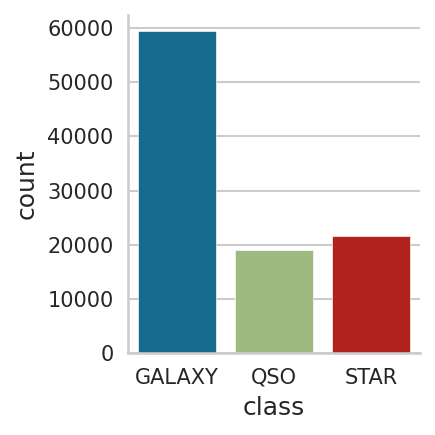

In [ ]:
sns.catplot(x = 'class', kind = 'count', data = raw_df,height=3)

In [ ]:
ex.pie(raw_df,names='class',title='Proportion of different classes')

The data looks a little imbalanced, but for now lets just consider this and lets trains some models.

In [ ]:
raw_df.columns.values

array(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class',
       'redshift', 'plate', 'MJD', 'fiber_ID'], dtype=object)

In [ ]:
#raw_df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in raw_df["class"]]

In [ ]:
raw_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
# Correlation of other features with redshift
corr1 = raw_df.corr()
corr1["redshift"].sort_values(ascending=False)

<ipython-input-29-d19ba94232b0>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



redshift       1.000000
z              0.501058
i              0.492383
r              0.433241
spec_obj_ID    0.388642
plate          0.388641
MJD            0.387109
g              0.318907
u              0.166815
fiber_ID       0.127044
obj_ID         0.065400
run_ID         0.065400
delta          0.031638
alpha          0.001667
cam_col        0.000097
field_ID      -0.021331
rerun_ID            NaN
Name: redshift, dtype: float64

Correlation of 'rerun_ID', 'cam_col', and 'field_ID' with 'redshift' is minimal. So, we choose to drop these columns

In [ ]:
raw_df.drop(['rerun_ID', 'cam_col', 'field_ID'], axis=1, inplace=True)

In [ ]:
raw_df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,2.751763e+18,STAR,-0.000008,2444,54082,232


<ipython-input-32-9f9687bf4706>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-32-9f9687bf4706>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-32-9f9687bf4706>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

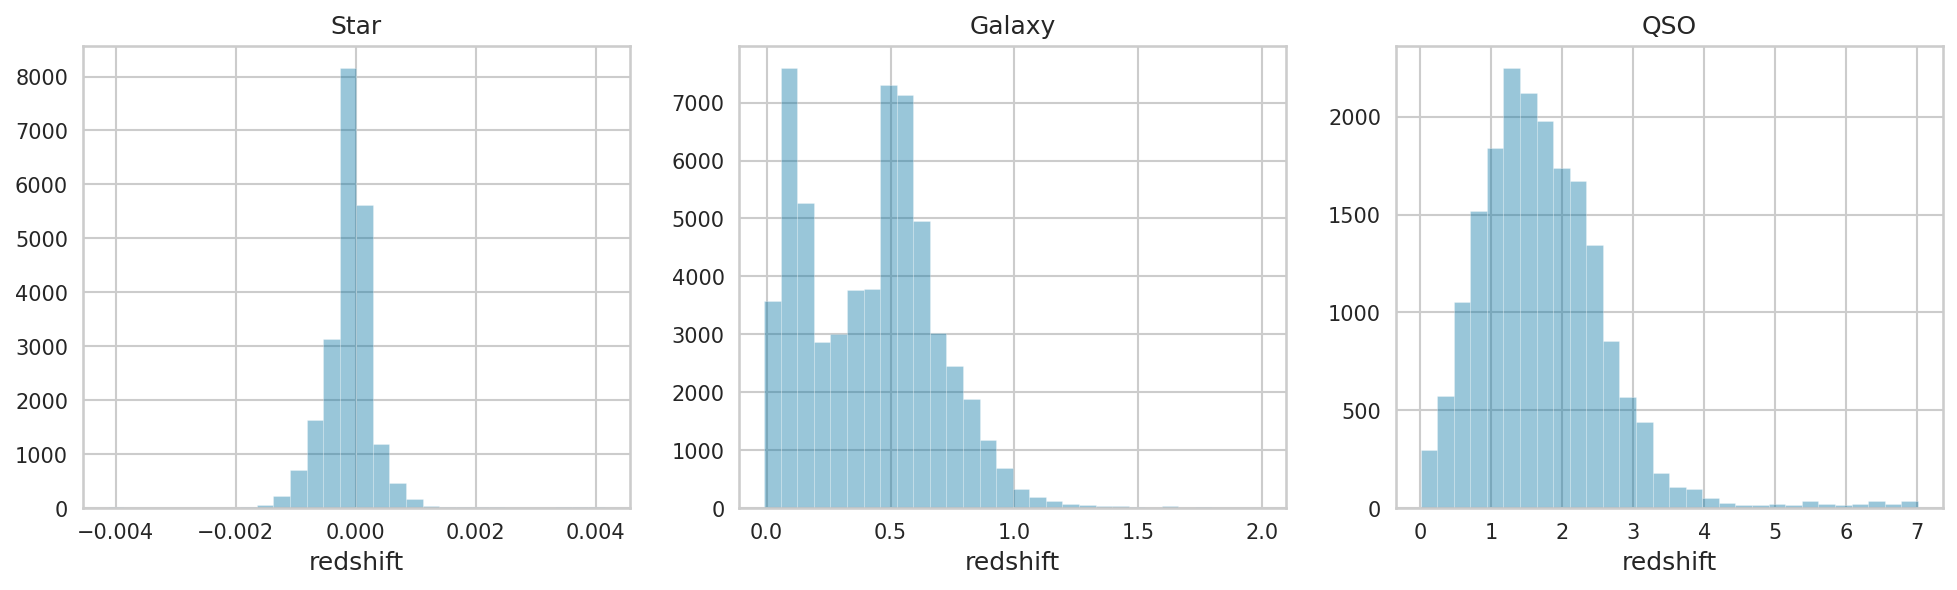

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(raw_df[raw_df['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(raw_df[raw_df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(raw_df[raw_df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

In [ ]:
# ! pip install --upgrade seaborn
# ! pip install --upgrade matplotlib

In [ ]:
# fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 4))
# ax = sns.lvplot(x=raw_df['class'], y=raw_df['dec'], palette='coolwarm')
# ax.set_title('dec')

<ipython-input-36-ea4440c7ec91>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



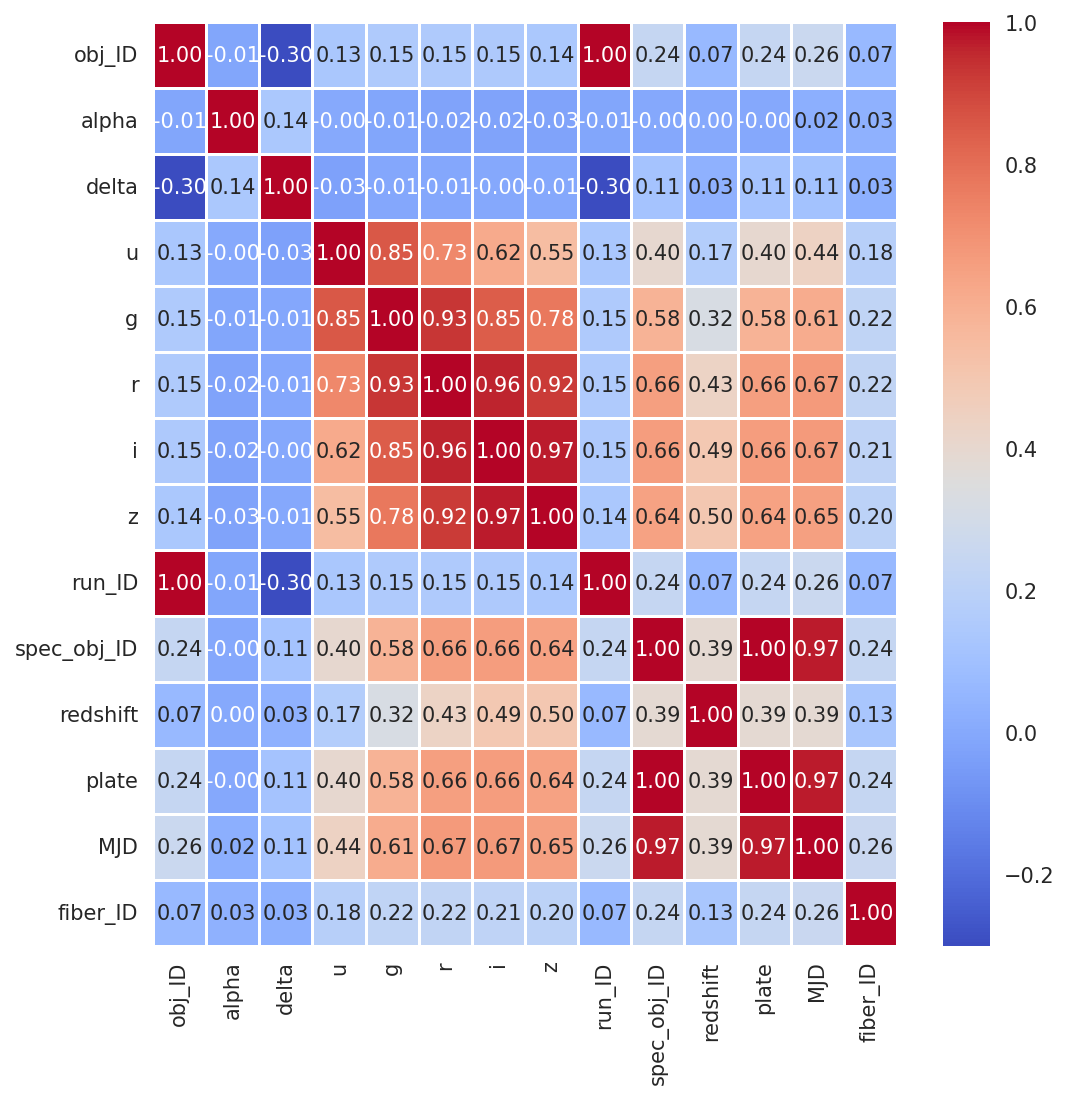

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(raw_df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm")
plt.show()

Observe that obj_ID and run_ID correlation is 1, spec_obj_ID and plate correlation is 1, spec_obj_ID and MJD correlation is almost 1, and correlation of MJD and plate is almost 1. So, we can drop run_ID, spec_obj_ID and plate.

Also see that correlation of alpha is almost 0 with all other features.

"MJD" column is for Modified Julian Date



In [ ]:
# Correlation of other features with redshift
corr = raw_df.corr()
corr["redshift"].sort_values(ascending=False)

<ipython-input-37-81decda37844>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



redshift       1.000000
z              0.501058
i              0.492383
r              0.433241
spec_obj_ID    0.388642
plate          0.388641
MJD            0.387109
g              0.318907
u              0.166815
fiber_ID       0.127044
obj_ID         0.065400
run_ID         0.065400
delta          0.031638
alpha          0.001667
Name: redshift, dtype: float64

In [ ]:
raw_df.drop(['run_ID', 'spec_obj_ID', 'plate', 'alpha'], axis=1, inplace=True)

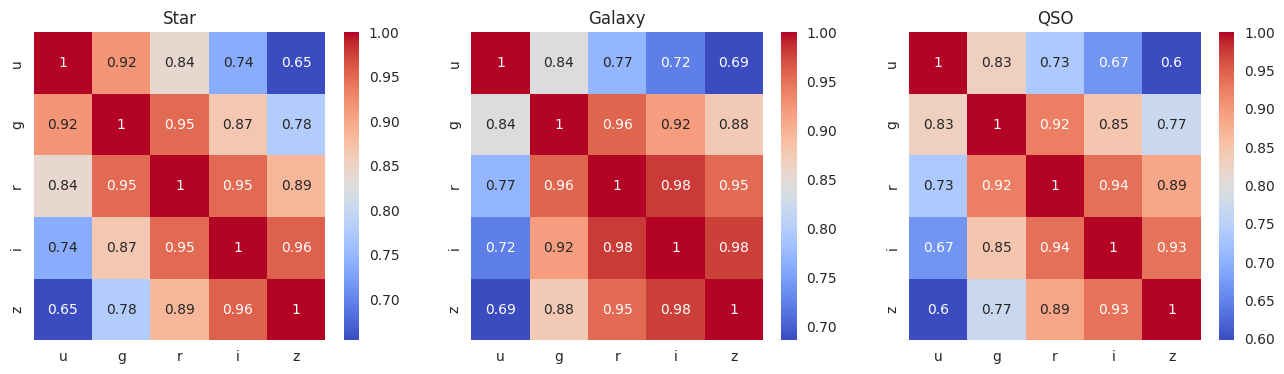

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(raw_df[raw_df['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm',annot=True)
ax.set_title('Star')
ax = sns.heatmap(raw_df[raw_df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm',annot=True)
ax.set_title('Galaxy')
ax = sns.heatmap(raw_df[raw_df['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm',annot=True)
ax = ax.set_title('QSO')

In [ ]:
# updated_df = raw_df

# # encode class labels to integers
# le = LabelEncoder()
# y_encoded = le.fit_transform(updated_df['class'])
# updated_df['class'] = y_encoded

# # Principal Component Analysis
# pca = PCA(n_components=3)
# ugriz = pca.fit_transform(updated_df[['u', 'g', 'r', 'i', 'z']])

# # update dataframe 
# updated_df = pd.concat((updated_df, pd.DataFrame(ugriz)), axis=1)
# updated_df.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)
# updated_df.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)
# updated_df.head()

In [ ]:
# x = raw_df.drop(["class"], axis = 1)
# y = raw_df.loc[:,"class"].values

In [ ]:
# sm = SMOTE(random_state=42)
# print('Original dataset shape %s' % Counter(y))
# x, y = sm.fit_resample(x, y)
# print('Resampled dataset shape %s' % Counter(y))

In [ ]:
# sns.countplot(y, palette='Set2')
# plt.title("Class ",fontsize=12)
# plt.show()

In [ ]:
updated_df = raw_df

# Numeric feature scaling, encoding of categorical column and data splitting

In [ ]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(updated_df.drop('class', axis=1))

In [ ]:
# #updated_df = raw_df

# encoding class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(updated_df['class'])
updated_df['class'] = y_encoded

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(updated_df.drop('class', axis=1), updated_df['class'], test_size=0.25)

# K-nearest neighbour model training and prediction

In [ ]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Scikit-Learn's K Nearest Neighbors Classifier's prediction accuracy is: 71.25
Time consumed for training: 0.147 seconds
Time consumed for prediction: 0.83719 seconds


# Naive Bayes Model training and prediction

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
raw = scaler_gnb.fit_transform(updated_df.drop('class', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, updated_df['class'], test_size=0.33)

gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 91.35
Time consumed for training: 0.030 seconds
Time consumed for prediction: 0.01250 seconds


# XG Boost Classifier Model training and prediction

In [ ]:
xgb = XGBClassifier(n_estimators=10)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 97.78
Time consumed for training: 3.795
Time consumed for prediction: 0.01907 seconds


# Random forest classifier Model training and prediction

In [ ]:
# r_forest = RandomForestClassifier()
# r_forest.fit(X_train,y_train)
# predicted = r_forest.predict(X_test)
# score = r_forest.score(X_test, y_test)
# rf_score_ = np.mean(score)

# print('Accuracy : %.3f' % (rf_score_))

In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 97.76
Time consumed for training: 3.033 seconds
Time consumed for prediction: 0.04454 seconds


# Support Vector Machine Classifier Model training and prediction

In [ ]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 59.10
Time consumed for training: 262.509 seconds
Time consumed for prediction: 83.05863 seconds


# Model Performances Comparison

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time, svc_prediction_time]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,97.776000,3.795343,0.019069
Random Forest,97.764000,3.033368,0.044535
Naive Bayes,91.354545,0.030141,0.012496
KNN,71.248000,0.147196,0.837186
SVC,59.100000,262.508670,83.058631


Using K-fold Cross Validation in Random Forest Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.97946667 0.98026667 0.97946667 0.97746667 0.9784     0.97853333
 0.97826667 0.97746667 0.98093333 0.97813333]
Mean: 0.9788400000000002
Standard Deviation: 0.0010995756757343454


XGBoost

In [ ]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.97933333 0.97866667 0.97973333 0.978      0.978      0.978
 0.97893333 0.976      0.9796     0.9772    ]
Mean: 0.9783466666666666
Standard Deviation: 0.0010998181667894117


In [ ]:
# xgb.feature_importances_

In [ ]:
# updated_df.info()

In [ ]:
# print(updated_df.drop('class', axis=1).columns)

In [ ]:
# print(len(updated_df.drop('class', axis=1).columns))
# print(len(xgb.feature_importances_))


In [ ]:
# xgb.feature_importances_

In [ ]:
# # Feature importance
#importances = pd.DataFrame({
#     'Feature': updated_df.drop('class', axis=1).columns,
#     'Importance': xgb.feature_importances_})
# importances = importances.sort_values(by='Importance', ascending=False)
# importances = importances.set_index('Feature')
# importances

In [ ]:
# importances = pd.DataFrame({
#     'Feature': updated_df.columns,
#     'Importance': xgb.feature_importances_})
# importances = importances.sort_values(by='Importance', ascending=False)
# importances = importances.set_index('Feature')
# importances

In [ ]:
# importances.plot.bar()

In [ ]:
# scaler = MinMaxScaler()
# sscd = pd.DataFrame(scaler.fit_transform(updated_df.drop(['MJD', 'class'], axis=1)), columns=updated_df.drop(['MJD', 'class'], axis=1).columns)
# sscd['class'] = updated_df['class']

In [ ]:
#sscd.head()

# Summary and References

In this project, the Star Class dataset is used which consists of 100000 observations and 18 features. The aim is to classify stars based on various features, total feature (18 features defined). We have performed exploratory data analysis to gather insights, created a training, validation & test dataset and prepared the data for modeling. Then, we trained and evaluated different machine learning models such as k-NN Classifier, Navie Bayes Classifier, Random Forest Classifier and XGboost Classifier.  We have seen that some ML models performs extremly well. Finally, we compared the performance of models are evaluated on a test data.

#References

1. The dataset used for this project is obtained from Kaggle and at https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download&select=star_classification.csv

2. https://jovian.com/learn/machine-learning-with-python-zero-to-gbms

3. https://jovian.com/kusum-sangwan/python-random-forests-assignment

4. https://www.geeksforgeeks.org/